In [1]:
import numpy as np
import sys
sys.path.append("..")
import lib.haar_wawelet_method.gradients as grad
import lib.data as data
import matplotlib.pyplot as plt
import lib.mesurements
import lib.haar_wawelet_method.haar as haar
%matplotlib inline

In [2]:
def draw_plot(z):
    size = z.shape[0]
    x,y = np.meshgrid(range(0,size),range(0,size))
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(30,30))
    ax = fig.gca(projection='3d')
    ax.plot_wireframe(x, y, z)
    ax.set_zlim(0, 2)
    ax.set_xlim(0,size)
    ax.set_ylim(0,size)
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    majorLocator = MultipleLocator(2)
    majorFormatter = FormatStrFormatter('%d')
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_formatter(majorFormatter)

In [3]:
from ReportTools.WaweletMethodFrequencyCharackteristickExperiment import WaweletMethodFrequencyCharackteristickExperiment

/home/satbek/Course-work-sem7/ExperimentResults/WaweletMethodFrequencyCharackteristickExperiment


In [4]:
ex = WaweletMethodFrequencyCharackteristickExperiment("256*256grid_with_noise", grid_degree=6)

Write description to experiment: fdsfs


In [5]:
ex.execute(noised=True, photons=0.5)

N/A% (0 of 49) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--../lib/data.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  scale_factor = photons / noised_image.max()
../lib/data.py:46: RuntimeWarning: invalid value encountered in multiply
  noised_image = noised_image * scale_factor
../lib/data.py:47: RuntimeWarning: invalid value encountered in less
  noised_image = np.random.poisson(noised_image)
../lib/data.py:47: RuntimeWarning: invalid value encountered in greater
  noised_image = np.random.poisson(noised_image)
100% (49 of 49) |#########################| Elapsed Time: 0:00:03 Time: 0:00:03


array([[1.        , 0.83736144, 0.8469283 , 0.93940086, 1.04521696,
        0.98321108, 1.01142754],
       [0.89064499, 0.90734541, 0.77965022, 0.7158752 , 1.06990002,
        1.19840803, 0.97451178],
       [0.96691311, 1.67154325, 0.99244296, 1.22228492, 1.03371898,
        0.95402272, 1.04419493],
       [0.8425799 , 0.90844933, 0.94188758, 2.10461815, 0.96855266,
        0.85361633, 1.08362496],
       [1.13855725, 1.05576664, 1.55185716, 1.04562766, 0.98840089,
        0.98809627, 1.12074727],
       [1.01627594, 1.34831362, 0.75500545, 1.1834155 , 0.87874828,
        0.98672856, 1.02588872],
       [0.96504154, 1.13726705, 1.04644808, 0.96669772, 0.85767453,
        1.19160311, 1.00366641]])

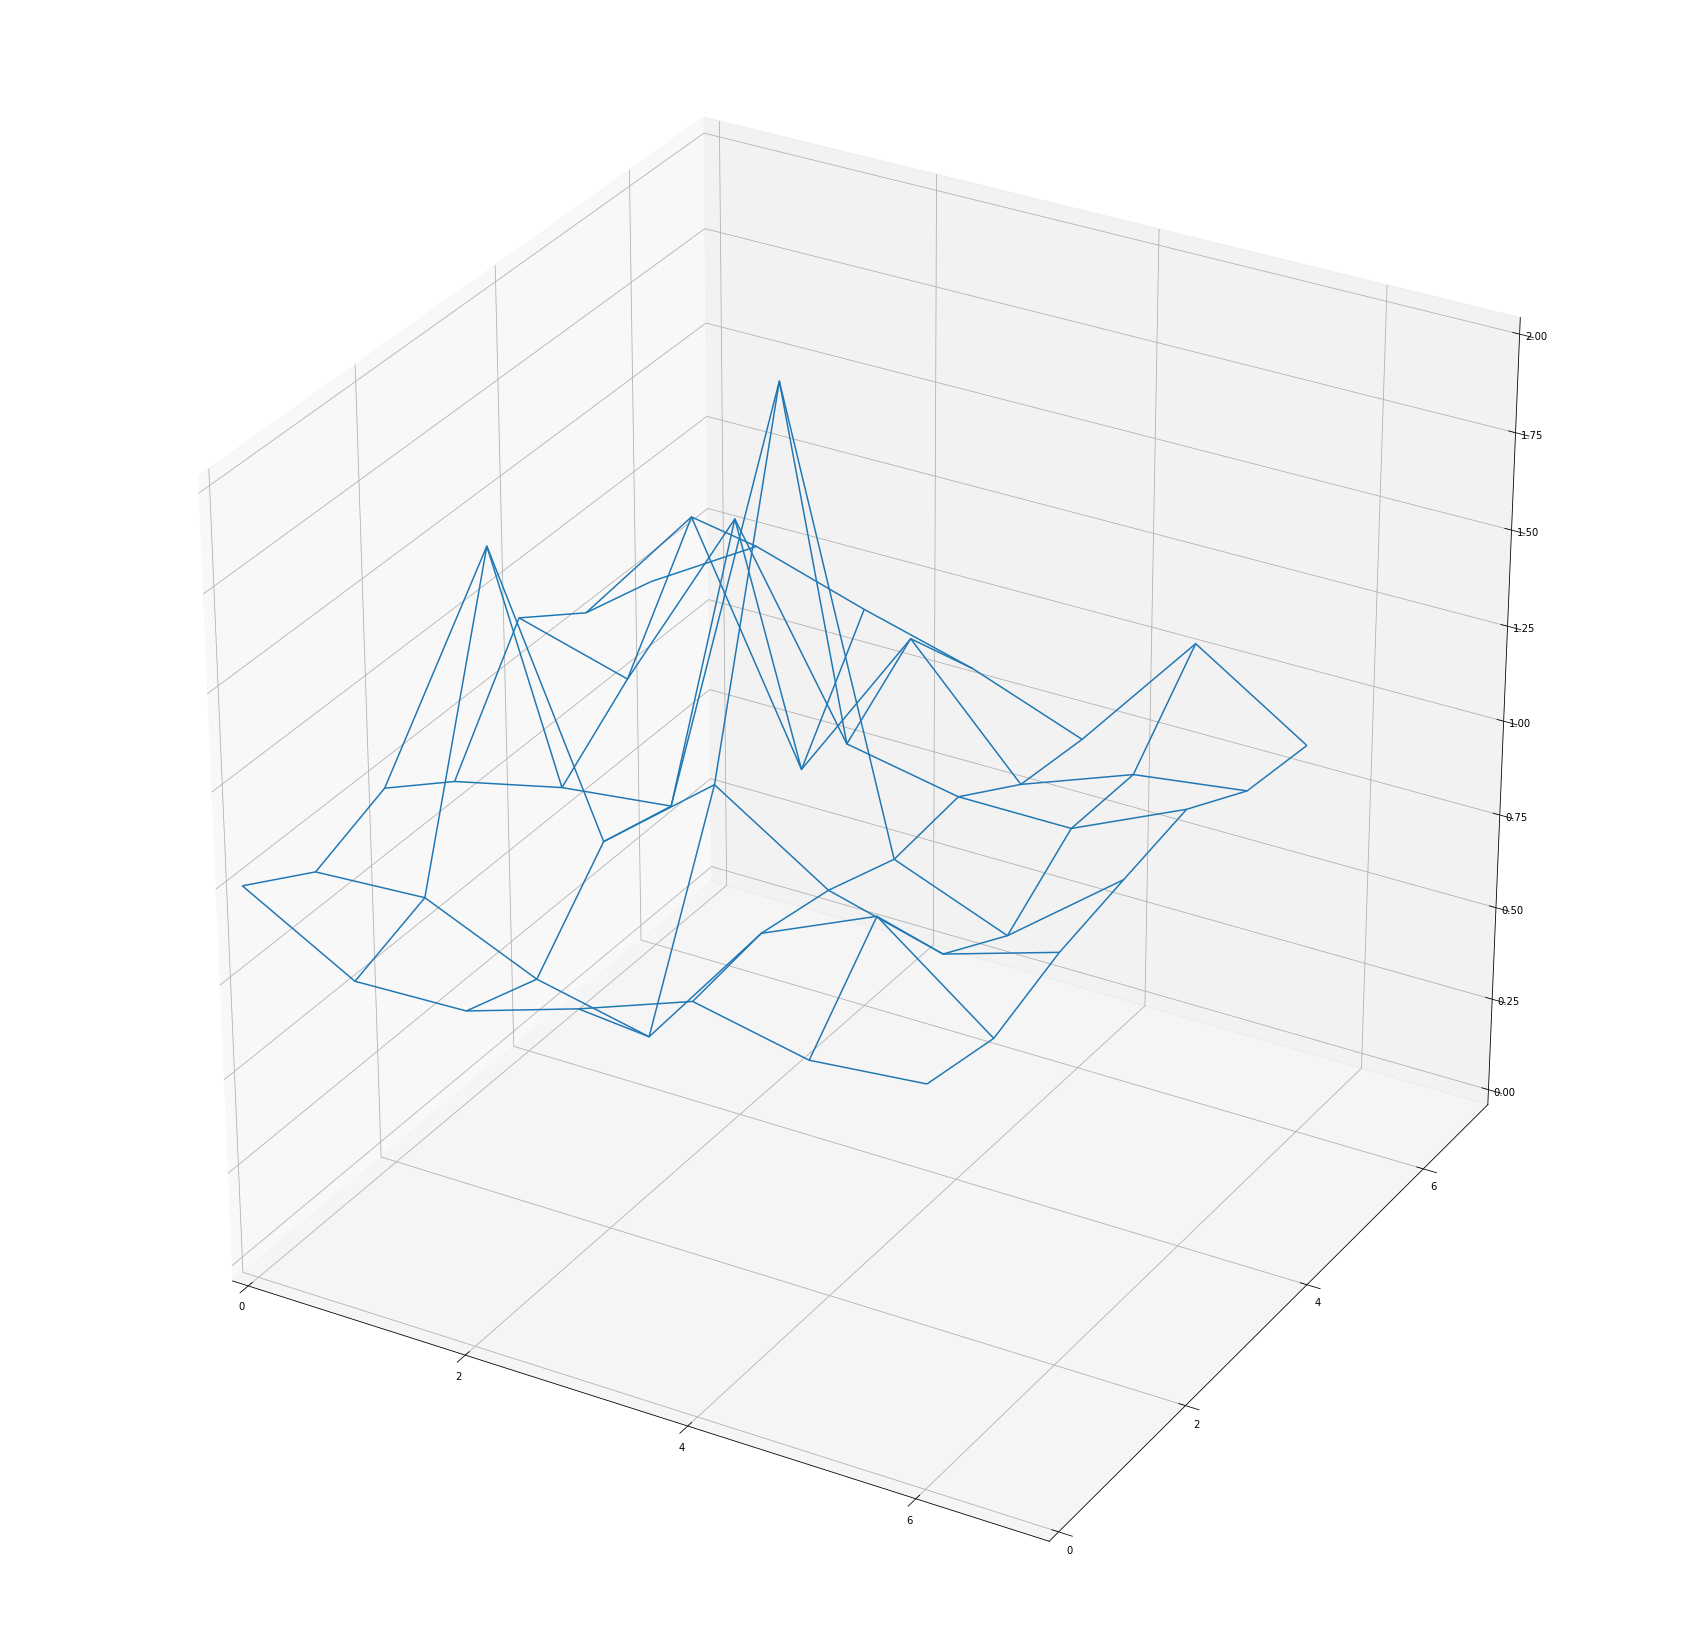

In [6]:
ex.draw_plot()

In [7]:
def compare_ideal(i,j,M, noised = False, photons = 1):
    x,y = data.get_plane(-np.pi, np.pi,-np.pi,np.pi,M)
    im = my_exp(x,y,i,j)
    grad_X, grad_Y = i * x * 1j * my_exp(x,y,i,j), j * y * 1j * my_exp(x,y,i,j)
    if (noised):
        #как зашумлять комплексные числа?
        grad_X = poisson_noised(grad_X.real, photons) + 1j*poisson_noised(grad_X.imag, photons)
        grad_Y = poisson_noised(grad_Y.real, photons) + 1j*poisson_noised(grad_Y.imag, photons)
    LH, HL, HH = haar.analyze(grad_X, grad_Y, grad_X, grad_Y)
    res = haar.syntesis({0:np.array([[np.mean(im)*2**M]])}, LH, HL, HH,M)
    return np.abs(np.fft.fft2(im)[j,i])/np.abs(np.fft.fft2(res[M])[j,i])

In [8]:
ex.save()

Write report to experiment: fdsfd
/home/satbek/Course-work-sem7/ExperimentResults/WaweletMethodFrequencyCharackteristickExperiment/256*256grid_with_noise1522783781.380892


In [ ]:
def calc_z_ideal (M, noised = False, photons = 1):
    size = 2**M
    z = np.zeros(size**2).reshape(size,size)
    for i in range (size):
        print(i)
        if (i*10 <= size):
            for j in range(size):
                print(j)
                if (j*10 <= size):
                    z[i,j] = compare_ideal(i,j,M, noised,photons)
                else:
                    break
        else :
            continue
    return z